In [103]:
path = 'C:/Users/WISITP/Desktop/acse4-4-elbo/prediction_compare.csv'
path_grey = 'C:/Users/WISITP/Desktop/acse4-4-elbo/n_grey.csv'
path_color = 'C:/Users/WISITP/Desktop/acse4-4-elbo/n_color.csv'

In [104]:
from numpy import genfromtxt
import numpy as np
data = genfromtxt(path, delimiter=',')
data_g = genfromtxt(path_grey, delimiter=',')  # amount of input grey images in each class
data_c = genfromtxt(path_color, delimiter=',') # amount of input color images in each class

In [58]:
label = data[:,0].astype('int')  #class id
count = data[:,1].astype('int')  # 1 means res34 prediction matches with res50, otherwise 0 (treat as correct prediction)

In [72]:
hist_match = np.zeros(200)
hist_mismatch = np.zeros(200)
for i in range(10000):
    if count[i] == 1:
        hist_match[int(label[i])] +=1
    else:
        hist_mismatch[int(label[i])] +=1

Text(0.5, 1.0, 'Samples that Res34 does matches Res50')

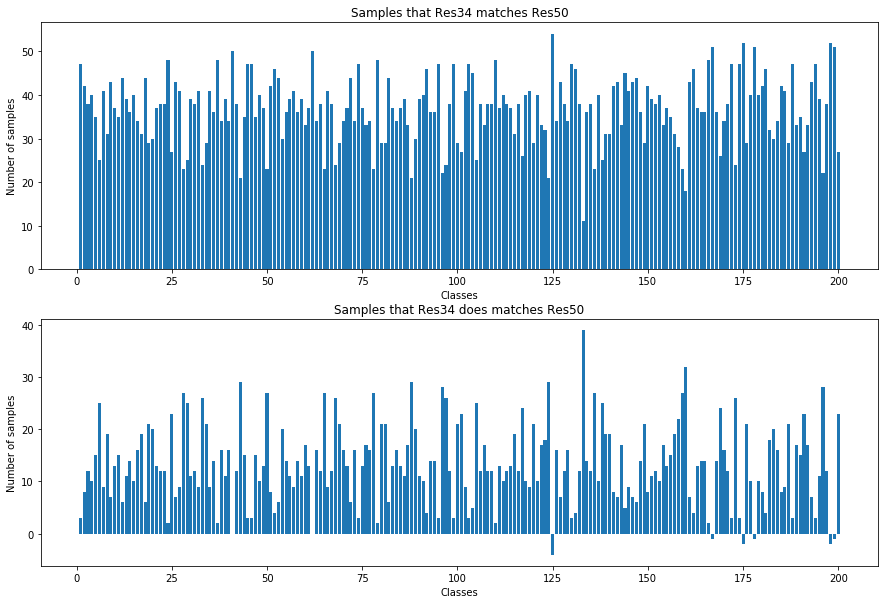

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.bar(np.arange(1,201),hist_match)
plt.title('Samples that Res34 matches Res50')
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.subplot(2,1,2)
plt.bar(np.arange(1,201),50-hist_match)
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.title('Samples that Res34 does matches Res50')

In [121]:
print(hist_match.sum()/10000)  # no of matched prediction (from 2 models) is close to test accuracy

0.7348


Text(0, 0.5, 'Grey Image Ratio')

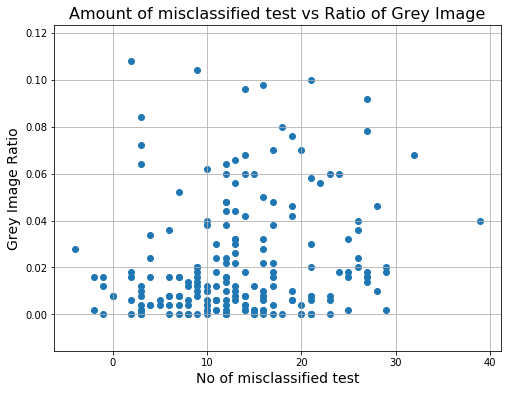

In [118]:
# TO check if input grey image in each class has influence on prediction performance

plt.figure(figsize=(8,6))
plt.scatter(50-hist_match, data_g/(data_g+data_c))
plt.grid(True)
plt.title("Amount of misclassified test vs Ratio of Grey Image", fontsize=16)
plt.xlabel('No of misclassified test', fontsize=14)
plt.ylabel('Grey Image Ratio', fontsize=14)